In [4]:
import os

In [9]:
data_dir = '/Users/sbandi/Documents/Jupyter/Deeplearning/TF_2_Notebooks_and_Data/DATA/cell_images'

In [10]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [11]:
data_dir_train = data_dir+'/train'

In [12]:
data_dir_test = data_dir+'/test'

In [13]:
os.listdir(data_dir_train)

['.DS_Store', 'parasitized', 'uninfected']

In [25]:
os.listdir(data_dir_train+'/uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

In [16]:
from matplotlib.image import imread

In [23]:
para_img = imread(data_dir_train+'/parasitized/'+'C189P150ThinF_IMG_20151203_142224_cell_84.png')

In [26]:
unfect_cell = imread(data_dir_train+'/uninfected/'+'C13NThinF_IMG_20150614_131318_cell_179.png')

In [29]:
para_img.shape

(121, 118, 3)

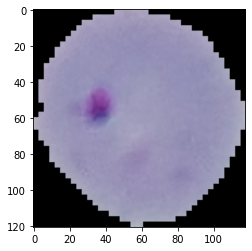

In [31]:
import matplotlib.pyplot as plt
plt.imshow(para_img)

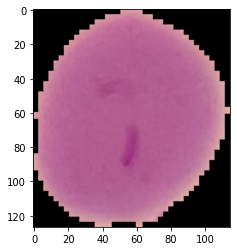

In [32]:
plt.imshow(unfect_cell)

In [37]:
len(os.listdir(data_dir_train+'/parasitized'))

12480

In [38]:
## Reshaping images

In [44]:
dim1 = []
dim2 = []

for img_file in os.listdir(data_dir_test+'/uninfected'):
     img = imread(data_dir_test+'/uninfected/'+img_file)
     d1,d2,color = img.shape
     dim1.append(d1)
     dim2.append(d2)
     

In [46]:
dim2

[127,
 121,
 151,
 130,
 124,
 127,
 136,
 124,
 124,
 130,
 127,
 115,
 154,
 115,
 100,
 121,
 151,
 142,
 118,
 172,
 127,
 124,
 136,
 190,
 121,
 121,
 142,
 142,
 127,
 190,
 142,
 148,
 118,
 145,
 205,
 142,
 151,
 118,
 130,
 118,
 184,
 121,
 127,
 151,
 148,
 121,
 115,
 124,
 127,
 148,
 121,
 148,
 160,
 163,
 139,
 139,
 103,
 172,
 121,
 124,
 145,
 112,
 115,
 136,
 142,
 130,
 166,
 112,
 94,
 142,
 118,
 139,
 112,
 118,
 136,
 136,
 163,
 151,
 154,
 121,
 124,
 133,
 139,
 115,
 100,
 103,
 139,
 112,
 106,
 115,
 70,
 139,
 133,
 136,
 118,
 139,
 145,
 115,
 94,
 127,
 124,
 124,
 106,
 112,
 157,
 142,
 124,
 148,
 100,
 118,
 112,
 142,
 106,
 94,
 109,
 103,
 124,
 133,
 145,
 124,
 136,
 127,
 112,
 166,
 124,
 130,
 121,
 136,
 139,
 127,
 121,
 121,
 124,
 136,
 133,
 151,
 130,
 136,
 139,
 130,
 133,
 160,
 130,
 121,
 142,
 118,
 115,
 157,
 145,
 145,
 118,
 145,
 124,
 127,
 112,
 115,
 136,
 142,
 115,
 127,
 112,
 118,
 127,
 127,
 133,
 139,
 142,
 1

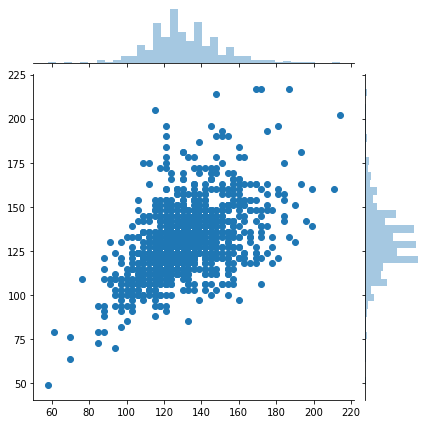

In [48]:
import seaborn as sns
sns.jointplot(dim1,dim2)

In [49]:
np.mean(dim1)

130.92538461538462

In [50]:
np.mean(dim2)

130.75

In [83]:
image_shape = (130,130,3)

In [52]:
130*130*3

50700

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
datagen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.1,
                            zoom_range=0.1,
                            fill_mode='nearest')

In [56]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

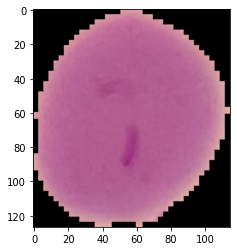

In [59]:
plt.imshow(unfect_cell)

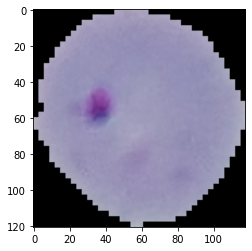

In [61]:
plt.imshow(para_img)

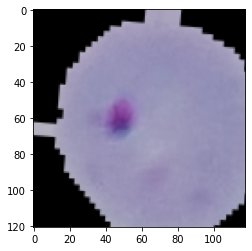

In [67]:
plt.imshow(datagen.random_transform(para_img))

In [68]:
datagen.flow_from_directory(data_dir_train)

Found 24958 images belonging to 2 classes.


In [69]:
datagen.flow_from_directory(data_dir_test)

Found 2600 images belonging to 2 classes.


In [70]:
## Creating Model

In [80]:
from tensorflow.keras.layers import Activation,Dropout,Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential

In [84]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [97]:
batch_size = 16

In [110]:
train_image_gen = datagen.flow_from_directory(data_dir_train,target_size=image_shape[:2],
                                              color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [111]:
test_image_gen = datagen.flow_from_directory(data_dir_test,target_size=image_shape[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [112]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
from tensorflow.keras.preprocessing import image

In [118]:
image.load_img(para_img)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [117]:
model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.